In [ ]:
pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as data
import yfinance
import datetime


In [ ]:
!pip install pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas-datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 12, 31)
df = yfinance.download('AAPL', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451065,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517090,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896339,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869423,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290054,144114400


In [ ]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401016,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [ ]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


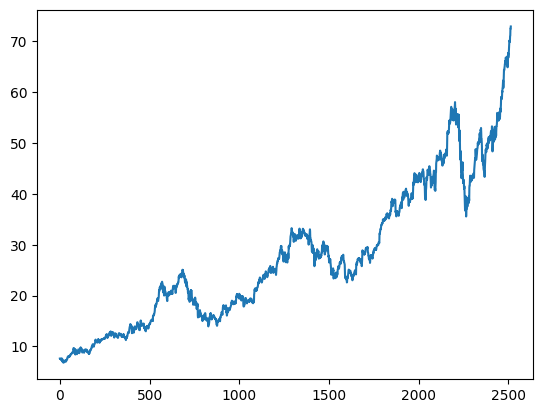

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

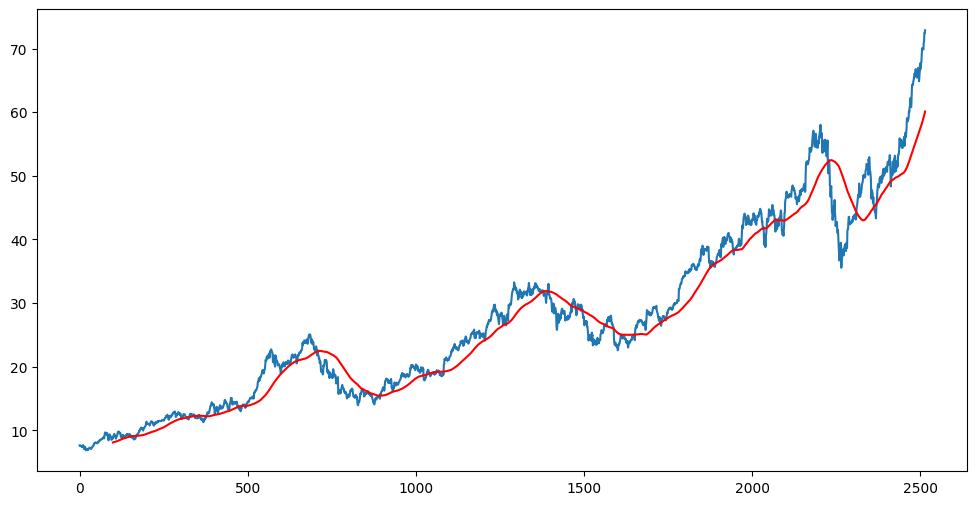

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

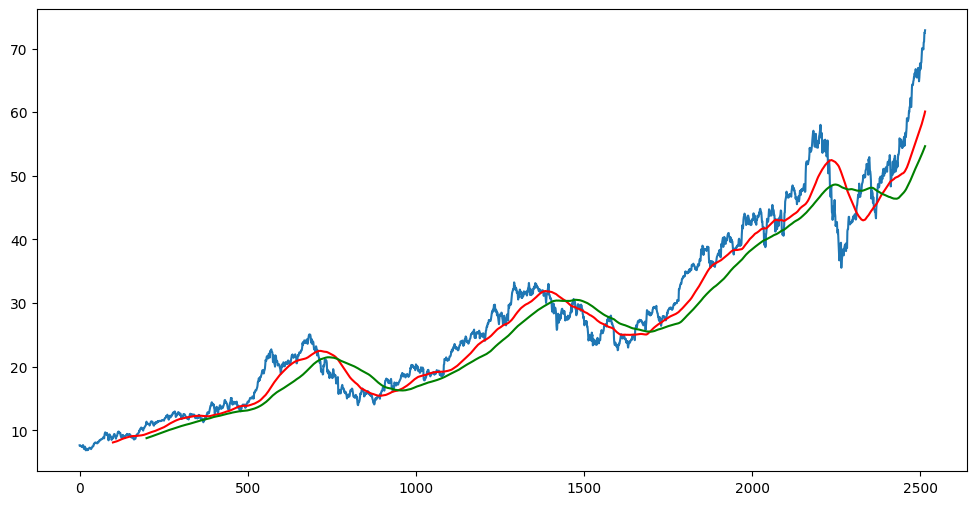

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'red')
plt.plot(ma200,'g')

In [ ]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])

data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)


In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
52/52 [==============================] - 37s 496ms/step - loss: 0.0947
Epoch 2/50
52/52 [==============================] - 19s 363ms/step - loss: 0.0160
Epoch 3/50
52/52 [==============================] - 17s 332ms/step - loss: 0.0126
Epoch 4/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0107
Epoch 5/50
52/52 [==============================] - 19s 361ms/step - loss: 0.0101
Epoch 6/50
52/52 [==============================] - 19s 362ms/step - loss: 0.0097
Epoch 7/50
52/52 [==============================] - 19s 365ms/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 18s 337ms/step - loss: 0.0082
Epoch 9/50
52/52 [==============================] - 18s 338ms/step - loss: 0.0080
Epoch 10/50
52/52 [==============================] - 19s 353ms/step - loss: 0.0085
Epoch 11/50
52/52 [==============================] - 17s 333ms/step - loss: 0.0080
Epoch 12/50
52/52 [==============================] - 19s 357ms/step - loss: 0.0076
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing,ignore_index=True)

<ipython-input-31-4d8ac21bc040>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [ ]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])

In [ ]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
y_pridicted = model.predict(x_test)
y_pridicted.shape

24/24 [==============================] - 3s 92ms/step


(755, 1)

In [ ]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [ ]:
y_pridicted

array([[0.13793302],
       [0.13911358],
       [0.14015308],
       [0.14102317],
       [0.14171031],
       [0.14222366],
       [0.1426074 ],
       [0.14293179],
       [0.14326432],
       [0.14366466],
       [0.1441634 ],
       [0.14476173],
       [0.145459  ],
       [0.1462467 ],
       [0.14710227],
       [0.14799933],
       [0.14891165],
       [0.14981131],
       [0.15070665],
       [0.151616  ],
       [0.15255108],
       [0.15350801],
       [0.15446582],
       [0.15552902],
       [0.15682146],
       [0.1584341 ],
       [0.16043179],
       [0.16285533],
       [0.16571225],
       [0.1689764 ],
       [0.17258179],
       [0.17645818],
       [0.18055648],
       [0.18482333],
       [0.18919082],
       [0.1935868 ],
       [0.19794905],
       [0.20222351],
       [0.20635316],
       [0.21028586],
       [0.21397194],
       [0.21737985],
       [0.22052686],
       [0.22342971],
       [0.22610906],
       [0.22858426],
       [0.23086986],
       [0.232

In [ ]:
scaler.scale_

array([0.02123255])

In [ ]:
scale_factor = 1/0.02123255
y_pridicted = y_pridicted*scale_factor
y_test = y_test*scale_factor

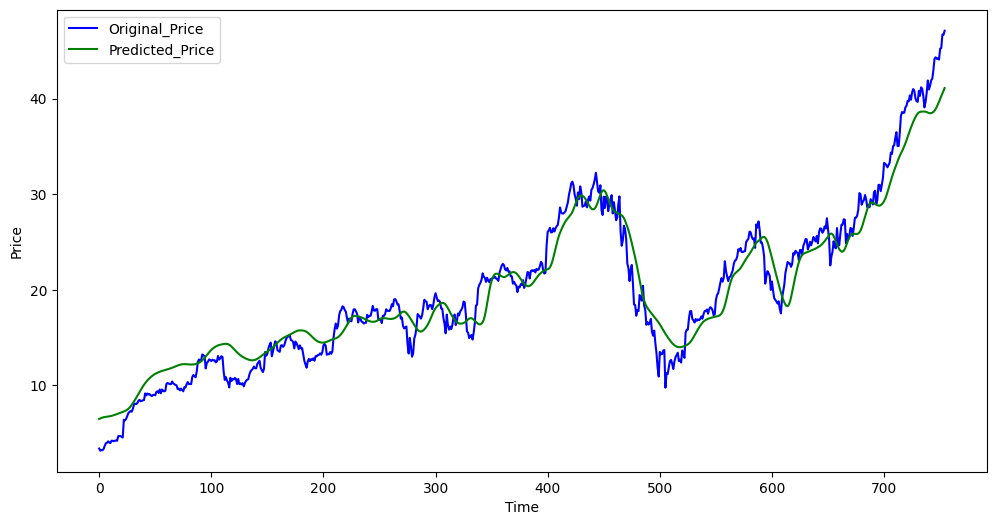

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original_Price')
plt.plot(y_pridicted,'g',label='Predicted_Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.1 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=2e6283125aaf63ac90d507a84ebf81522ce198e943cb1735b05c3113f55a8502
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance
from keras.models import load_model

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance
from keras.models import load_model

start = '2010-01-01'
end = '2019-12-31'
st.title("Stock Trend Prediction")
user_input = st.text_input('Enter Stock Ticker','AAPL')
df = yfinance.download(user_input, start=start, end=end)

st.subheader('Data From 2010 - 2019')
st.write(df.describe())

st.subheader('Closing Price vs Time Chart')
fig = plt.figure(figsize=(12,6))
plt.plot(df.Close)
st.pyplot(fig)

Writing app.py


In [ ]:
from pyngrok import ngrok
public_url=ngrok.connect(port ='8501')
ssh_url=ngrok.connect(22, "tcp")

INFO:pyngrok.ngrok:Opening tunnel named: http-80-8e57eba1-8abf-423b-9e86-0b25e5dde412
2023-03-29 19:14:53.305 Opening tunnel named: http-80-8e57eba1-8abf-423b-9e86-0b25e5dde412
INFO:pyngrok.process.ngrok:t=2023-03-29T19:14:53+0000 lvl=info msg="no configuration paths supplied"
2023-03-29 19:14:53.359 t=2023-03-29T19:14:53+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-03-29T19:14:53+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-03-29 19:14:53.363 t=2023-03-29T19:14:53+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-03-29T19:14:53+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-03-29 19:14:53.370 t=2023-03-29T19:14:53+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2023-03-29T19:14:53+0000 lvl=info msg="starting web service" obj=web addr

In [ ]:
public_url

<NgrokTunnel: "http://b942-35-231-238-4.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[#.................] - fetchMetadata: sill resolveWithNewModule follow-redirect


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.238.4:8501

npx: installed 22 in 3.215s
your url is: https://free-queens-chew-35-231-238-4.loca.lt
2023-03-29 19:15:36.769103: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 19:15:36.769248: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-29 19:15:36.769271: W tensorflow/compiler/tf2tensorrt/utils/py_uti

2023-03-29 19:15:51.417 t=2023-03-29T19:15:51+0000 lvl=warn msg="failed to open private leg" id=b23a86476542 privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
2023-03-29 19:15:51.938 t=2023-03-29T19:15:51+0000 lvl=warn msg="failed to open private leg" id=7c43a8e8ed1b privaddr=localhost:80 err="dial tcp 127.0.0.1:80: connect: connection refused"
2023-03-29 19:17:46.400 t=2023-03-29T19:17:46+0000 lvl=warn msg="failed to open private leg" id=b4d0a628dd0c typ=proxy privaddr=localhost:22 err="dial tcp 127.0.0.1:22: connect: connection refused"
2023-03-29 19:17:46.408 t=2023-03-29T19:17:46+0000 lvl=warn msg="failed to open private leg" id=7a41a0d8b15a typ=proxy privaddr=localhost:22 err="dial tcp 127.0.0.1:22: connect: connection refused"
2023-03-29 19:17:46.698 t=2023-03-29T19:17:46+0000 lvl=warn msg="failed to open private leg" id=59c984e54ce9 typ=proxy privaddr=localhost:22 err="dial tcp 127.0.0.1:22: connect: connection refused"
2023-03-29 19:17:48.029 t=2023

  Stopping...
^C


In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 KB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19790 sha256=9d0c57ba499d9181affc5def6dc1fd621fbb5f9f9b0224a2c2b5e78f61d6e460
  Stored in directory: /root/.cache/pip/wheels/f6/89/59/49d4249e00957e94813ac136a335d10ed2e09a856c5096f95c
Successfully built pyngrok


In [ ]:
! ngrok authtoken 2NhSCYw1vG7pX0sCnpcPUIjyasu_2hHXg3pDvEFHYTsox2bUu

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


INFO:pyngrok.ngrok:Opening tunnel named: http-80-3cf409fa-f190-492b-9b4b-cf0cb7e6c63d
2023-03-29 19:13:55.093 Opening tunnel named: http-80-3cf409fa-f190-492b-9b4b-cf0cb7e6c63d
INFO:pyngrok.process.ngrok:t=2023-03-29T19:13:55+0000 lvl=info msg="no configuration paths supplied"
2023-03-29 19:13:55.144 t=2023-03-29T19:13:55+0000 lvl=info msg="no configuration paths supplied"
INFO:pyngrok.process.ngrok:t=2023-03-29T19:13:55+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
2023-03-29 19:13:55.149 t=2023-03-29T19:13:55+0000 lvl=info msg="using configuration at default config path" path=/root/.ngrok2/ngrok.yml
INFO:pyngrok.process.ngrok:t=2023-03-29T19:13:55+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
2023-03-29 19:13:55.156 t=2023-03-29T19:13:55+0000 lvl=info msg="open config file" path=/root/.ngrok2/ngrok.yml err=nil
INFO:pyngrok.process.ngrok:t=2023-03-29T19:13:55+0000 lvl=info msg="starting web service" obj=web addr

<NgrokTunnel: "http://43a4-35-231-238-4.ngrok.io" -> "http://localhost:80">

In [ ]:
ngrok.kill()

INFO:pyngrok.process:Killing ngrok process: 11828
2023-03-29 19:14:47.593 Killing ngrok process: 11828
